In [1]:
# Import modules.
import torch
import random

import numpy as np
import matplotlib.pyplot as plt

from trainer import Trainer
from torch import nn, optim
from hyperparameters import *
from torchinfo import summary
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import datasets, transforms
from network import Img2Img, WassersteinLoss

In [2]:
# Set training device.
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available.")
else:
    device = torch.device("cpu")
    print("CUDA is not available, using CPU instead.")

CUDA is available.


In [3]:
# Set random seed.
random_seed = 0

random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [4]:
# Set data transform.
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [5]:
# Get training dataset.
train_data = datasets.MNIST(
    root=DATASET_PATH,
    train=True,
    download=True,
    transform=transform,
)

# Split data to train and test.
train_data, test_data = random_split(
    dataset=train_data,
    lengths=[50000, 10000],
)

In [6]:
# Training data preprocessing.

# Convert data to dict with labels as keys and images as values.
label_to_image = {}

for image, label in train_data:
    if label not in label_to_image:
        label_to_image[label] = [image]
    else:
        label_to_image[label].append(image)

# Convert data to list of image pairs.
# The image pairs are pairs of image 0 and 5, 1 and 6, ..., 4 and 9,
# 5 and 0, 6 and 1, ..., 9 and 4.
temp_data = []
data_num = 3000

for i in range(data_num):
    for a, b in zip(range(0, 5), range(5, 10)):
        temp_data.append([label_to_image[a][i], label_to_image[b][i]])
        temp_data.append([label_to_image[b][i], label_to_image[a][i]])

# Replace original data with new data.
train_data = temp_data

In [7]:
# Testing data preprocessing.
label_to_image = {}

for image, label in test_data:
    if label not in label_to_image:
        label_to_image[label] = [image]
    else:
        label_to_image[label].append(image)

# Replace original data with new data.
test_data = label_to_image

In [8]:
# Set data loader.
train_loader = DataLoader(train_data, 256, True)

In [9]:
# Set model.
model = Img2Img().to(device)

In [10]:
# Set optimizer.
optimizer = optim.RAdam(params=model.parameters(), lr=0.001)

In [11]:
# Set loss function.
loss_fn = WassersteinLoss()
# loss_fn = nn.MSELoss()

In [12]:
# Show model summary.
summary(model=model, input_size=(1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Img2Img                                  [1, 1, 28, 28]            --
├─Conv2d: 1-1                            [1, 64, 14, 14]           1,088
├─Sequential: 1-2                        [1, 128, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 128, 7, 7]            131,200
│    └─BatchNorm2d: 2-2                  [1, 128, 7, 7]            256
│    └─ReLU: 2-3                         [1, 128, 7, 7]            --
├─Sequential: 1-3                        [1, 256, 3, 3]            --
│    └─Conv2d: 2-4                       [1, 256, 3, 3]            524,544
│    └─BatchNorm2d: 2-5                  [1, 256, 3, 3]            512
│    └─ReLU: 2-6                         [1, 256, 3, 3]            --
├─Flatten: 1-4                           [1, 2304]                 --
├─Linear: 1-5                            [1, 1024]                 2,360,320
├─Linear: 1-6                            [1, 2304]             

In [13]:
trainer = Trainer(model, loss_fn, optimizer, train_loader, test_data, device)

d:\python\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
d:\python\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


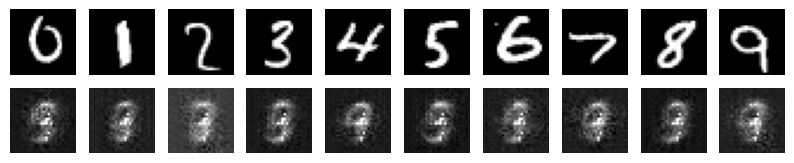

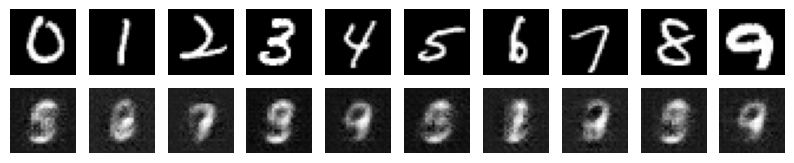

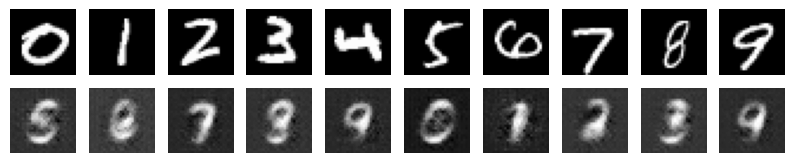

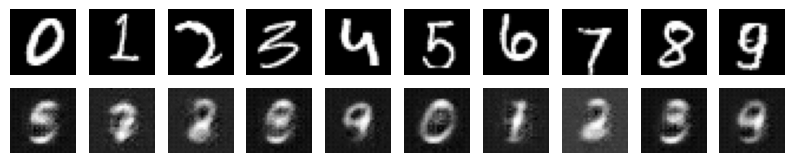

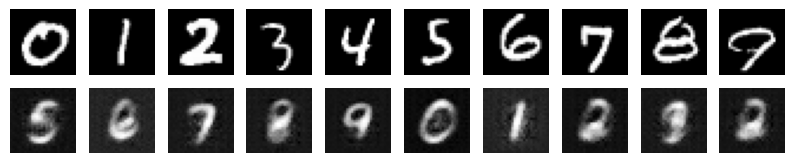

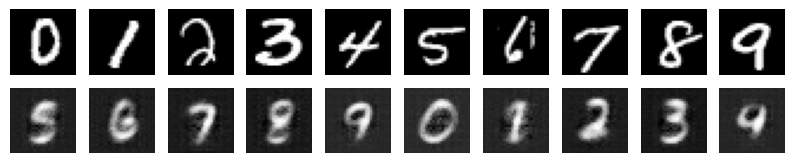

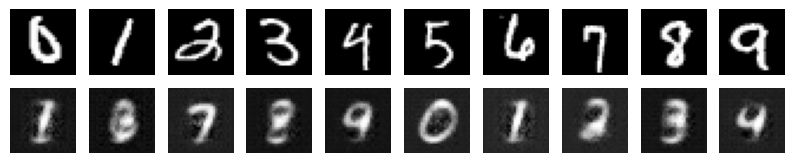

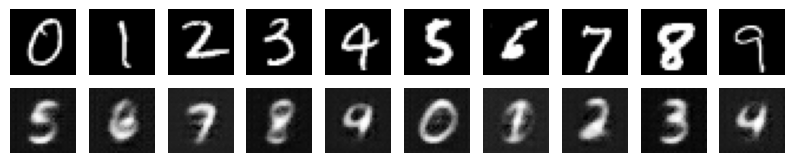

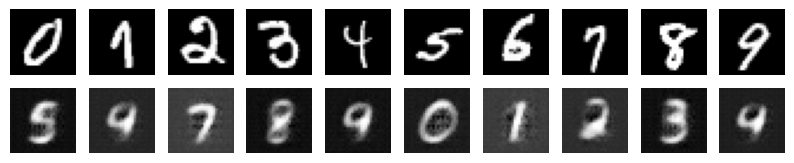

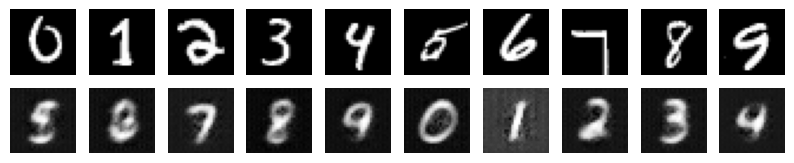

In [14]:
trainer.train(epoches=10)

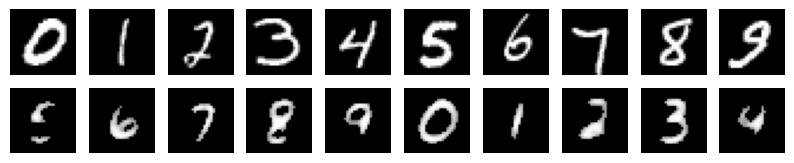

In [15]:
trainer.test(test_num=10, postprocess=True, threshold=0.5)

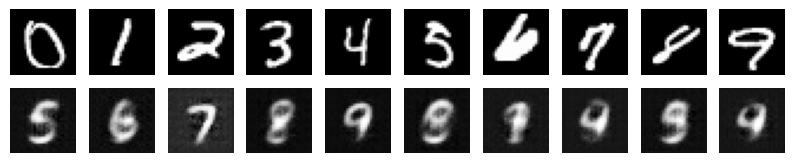

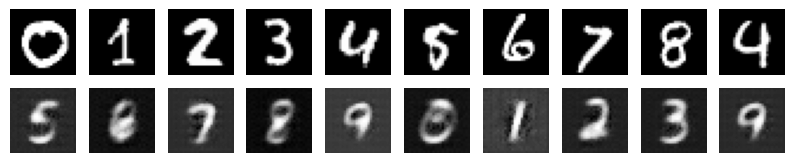

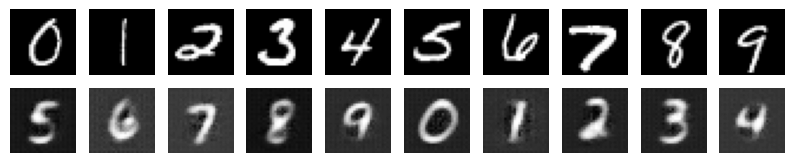

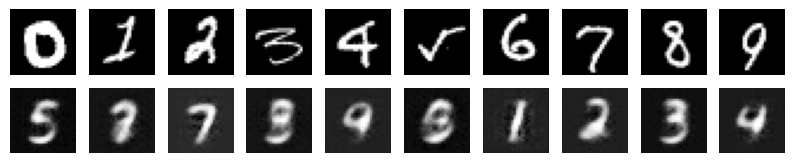

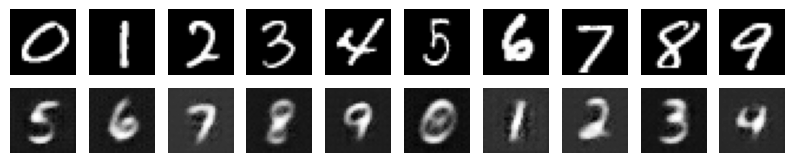

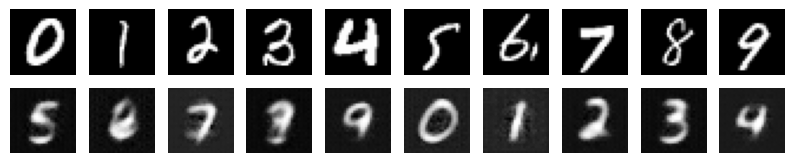

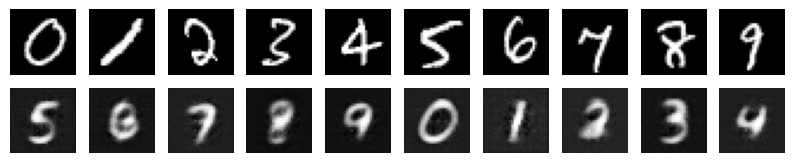

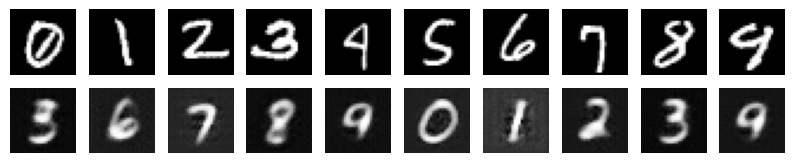

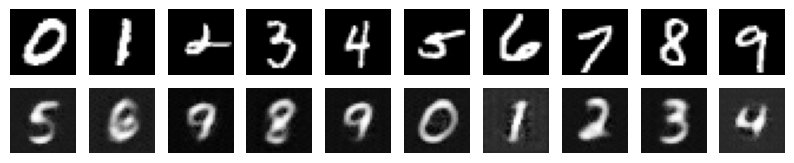

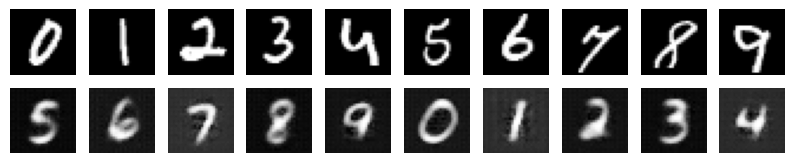

In [16]:
trainer.train(epoches=10)

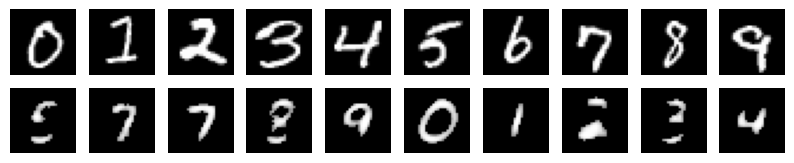

In [17]:
trainer.test(test_num=10, postprocess=True, threshold=0.5)

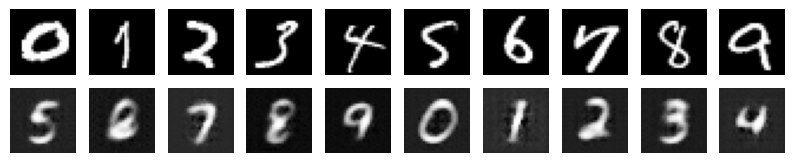

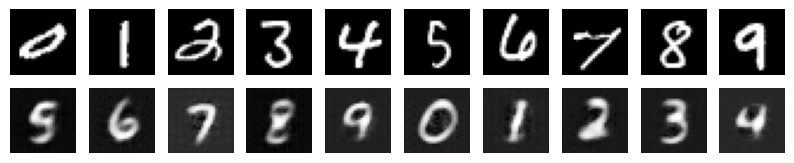

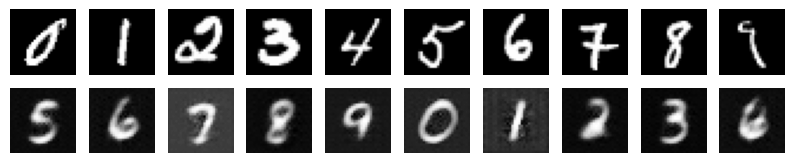

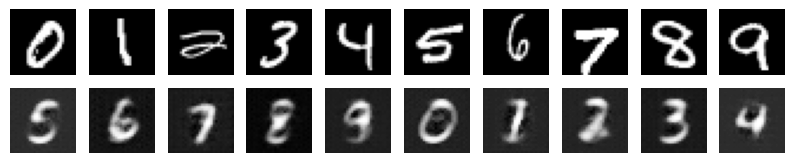

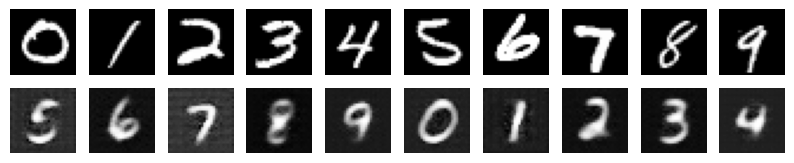

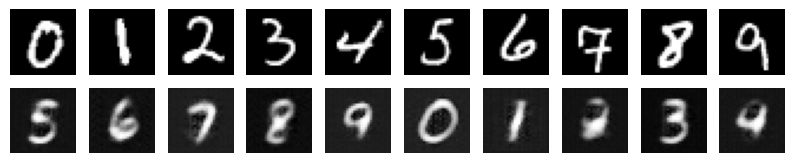

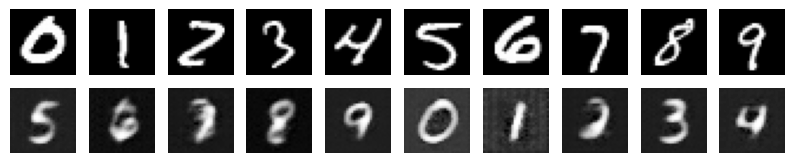

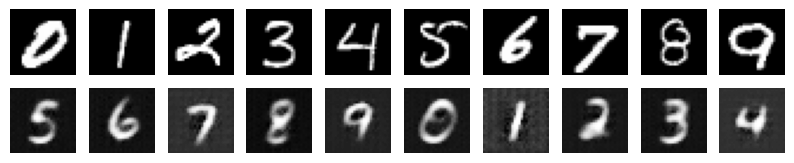

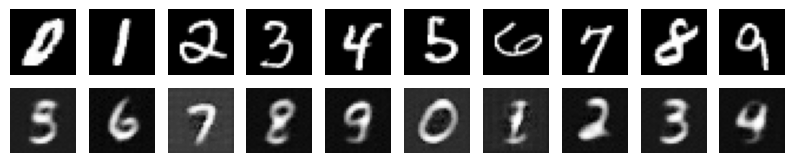

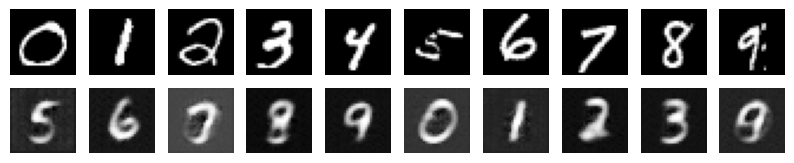

In [18]:
trainer.train(epoches=10)

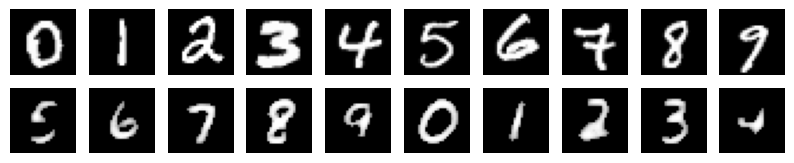

In [19]:
trainer.test(test_num=10, postprocess=True, threshold=0.5)

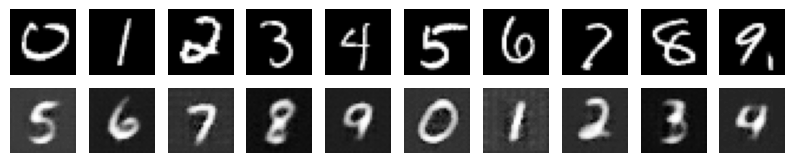

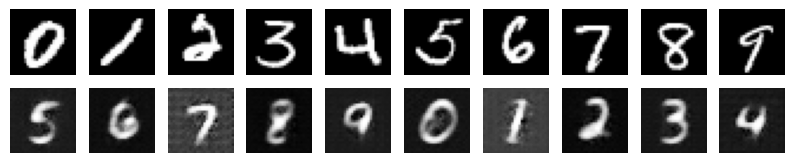

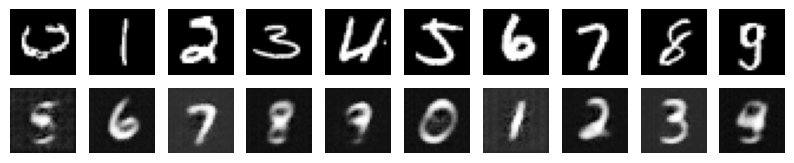

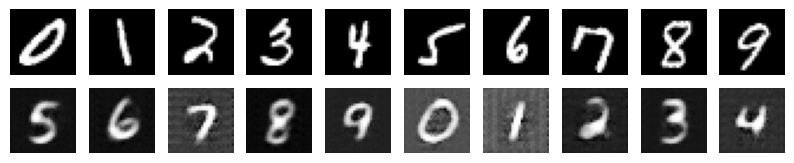

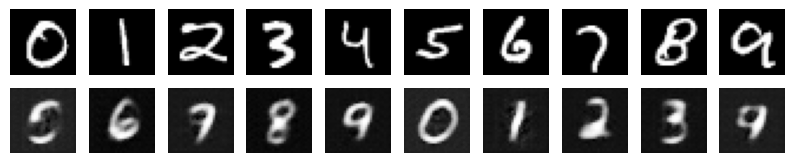

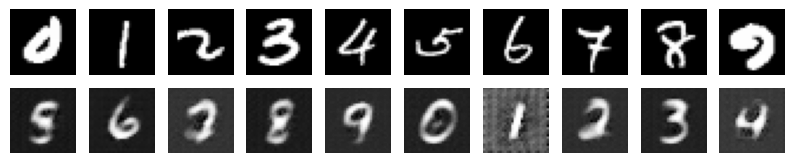

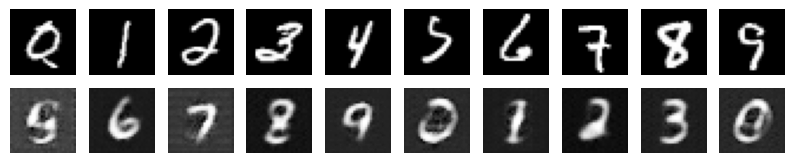

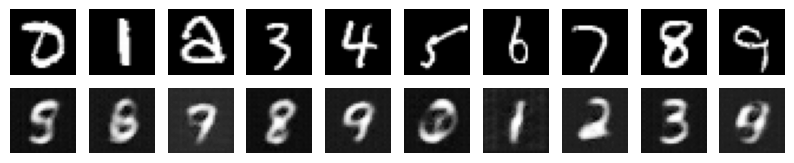

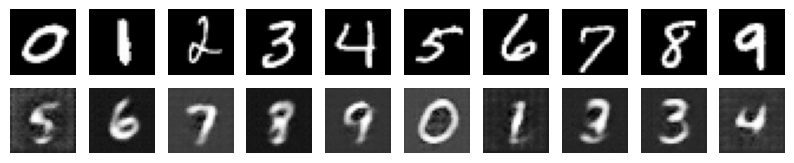

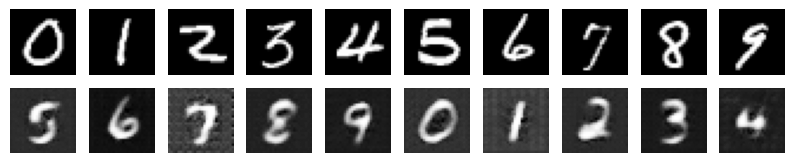

In [20]:
trainer.train(epoches=10)

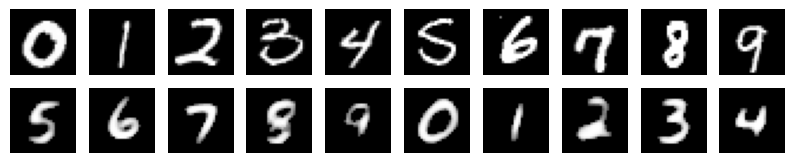

In [24]:
trainer.test(test_num=10, postprocess=True, threshold=0.3)